In [1]:
import pandas as pd

hc = pd.read_csv("hc_data.csv")
hc_sigmoid = hc.copy()[["CP_pre", "CP_post", "Slope_pre", "Slope_post"]]
hc_pre_loom = hc.copy()[
    ["Pre_Loom_300", "Pre_Loom_800", "Pre_Loom_1500", "Pre_Loom_2200", "Pre_Loom_2700"]
]
hc_post_loom = hc.copy()[
    [
        "Post_Loom_300",
        "Post_Loom_800",
        "Post_Loom_1500",
        "Post_Loom_2200",
        "Post_Loom_2700",
    ]
]

hc_pre_loom_ymin = hc_pre_loom.median().min()
hc_pre_loom_ymax = hc_pre_loom.median().max()

hc_post_loom_ymin = hc_post_loom.median().min()
hc_post_loom_ymax = hc_post_loom.median().max()

hc_sigmoid.median()

CP_pre        1448.0000
CP_post        920.5000
Slope_pre       -0.0435
Slope_post      -0.0850
dtype: float64

In [2]:
print("pre ymin, ymax : ", hc_pre_loom_ymin, hc_pre_loom_ymax)
print("post ymin, ymax : ", hc_post_loom_ymin, hc_post_loom_ymax)

pre ymin, ymax :  270.0 318.5
post ymin, ymax :  271.5 326.5


In [3]:
scz = pd.read_csv("scz_data_alter.csv")
scz_sigmoid = scz.copy()[["CP_pre", "CP_post", "Slope_pre", "Slope_post"]]
scz_pre_loom = scz.copy()[
    ["Pre_Loom_300", "Pre_Loom_800", "Pre_Loom_1500", "Pre_Loom_2200", "Pre_Loom_2700"]
]
scz_post_loom = scz.copy()[
    [
        "Post_Loom_300",
        "Post_Loom_800",
        "Post_Loom_1500",
        "Post_Loom_2200",
        "Post_Loom_2700",
    ]
]

scz_pre_loom_ymin = scz_pre_loom.median().min()
scz_pre_loom_ymax = scz_pre_loom.median().max()

scz_post_loom_ymin = scz_post_loom.median().min()
scz_post_loom_ymax = scz_post_loom.median().max()

scz_sigmoid.median()

CP_pre        1641.5000
CP_post       1176.0000
Slope_pre       -0.0450
Slope_post      -0.0615
dtype: float64

In [4]:
print("pre ymin, ymax : ", scz_pre_loom_ymin, scz_pre_loom_ymax)
print("post ymin, ymax : ", scz_post_loom_ymin, scz_post_loom_ymax)

pre ymin, ymax :  382.5 429.5
post ymin, ymax :  373.0 455.0


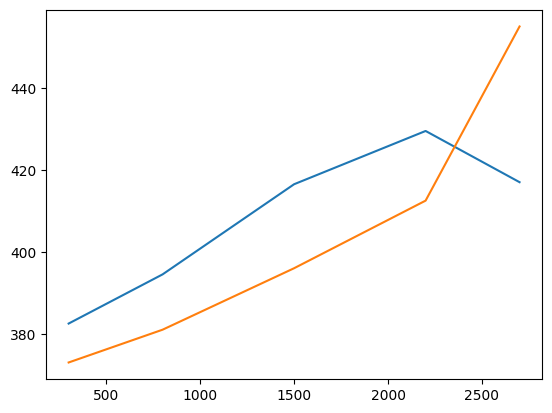

In [5]:
import matplotlib.pyplot as plt

distances = [2700, 2200, 1500, 800, 300]

plt.plot(distances, scz_pre_loom.median().values)
plt.plot(distances, scz_post_loom.median().values)

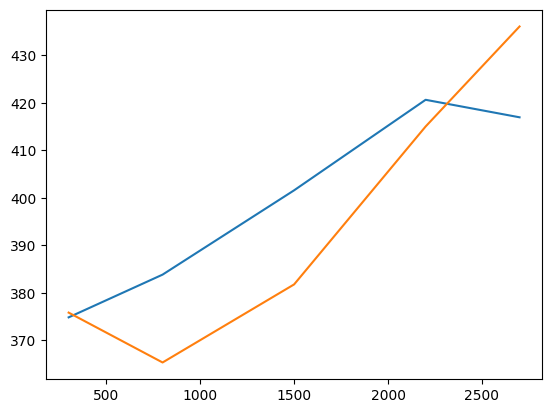

In [6]:
plt.plot(distances, scz_pre_loom.mean().values)
plt.plot(distances, scz_post_loom.mean().values)

In [7]:
scz_pre_loom.median().values

array([417. , 429.5, 416.5, 394.5, 382.5])

In [8]:
scz_post_loom.median().values

array([455. , 412.5, 396. , 381. , 373. ])

<Axes: xlabel='CP_pre', ylabel='Count'>

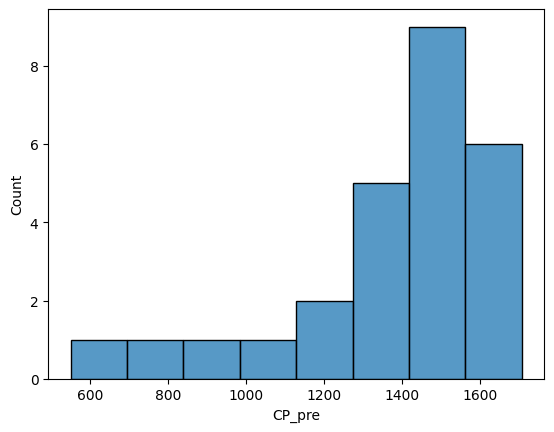

In [9]:
import seaborn as sns

sns.histplot(hc_sigmoid["CP_pre"])

<Axes: xlabel='CP_post', ylabel='Count'>

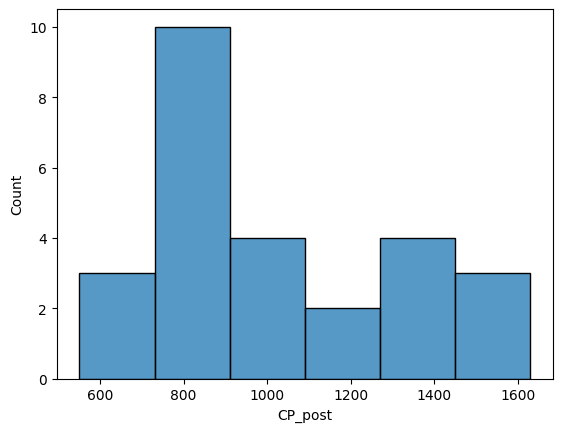

In [10]:
sns.histplot(hc_sigmoid["CP_post"])

<Axes: xlabel='Slope_pre', ylabel='Count'>

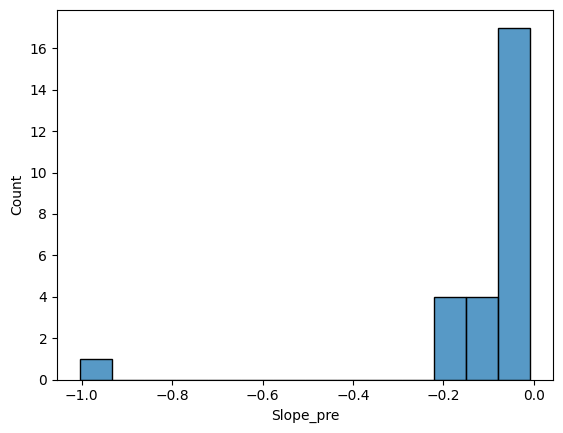

In [11]:
sns.histplot(hc_sigmoid["Slope_pre"])

<Axes: xlabel='Slope_post', ylabel='Count'>

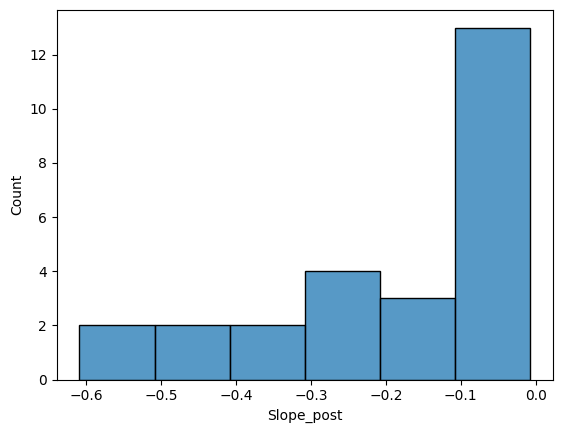

In [12]:
sns.histplot(hc_sigmoid["Slope_post"])

In [13]:
import scipy

scipy.stats.wilcoxon(hc_sigmoid["Slope_pre"], hc_sigmoid["Slope_post"])

WilcoxonResult(statistic=np.float64(111.5), pvalue=np.float64(0.10403442918132004))

In [14]:
scipy.stats.wilcoxon(hc_sigmoid["CP_pre"], hc_sigmoid["CP_post"])

WilcoxonResult(statistic=np.float64(39.0), pvalue=np.float64(0.0008905376442220464))

<Axes: xlabel='CP_pre', ylabel='Count'>

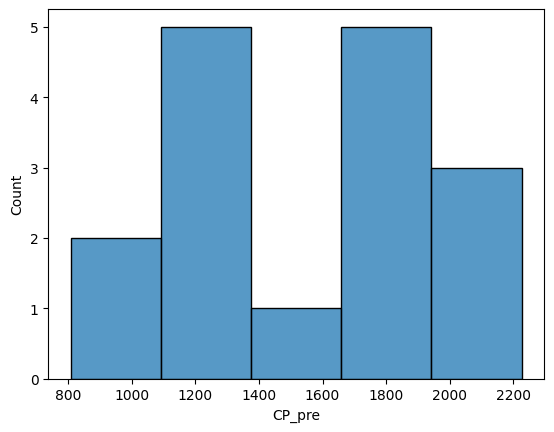

In [15]:
sns.histplot(scz_sigmoid["CP_pre"])

<Axes: xlabel='CP_post', ylabel='Count'>

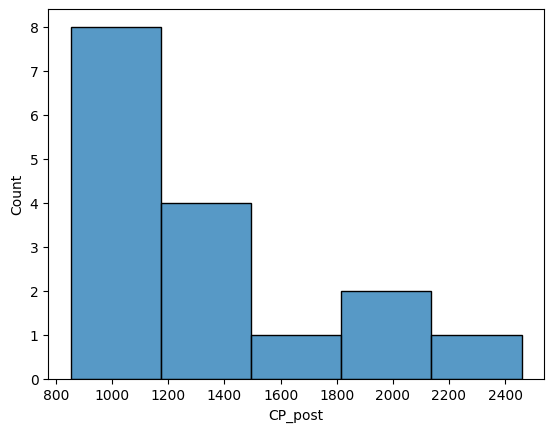

In [16]:
sns.histplot(scz_sigmoid["CP_post"])

<Axes: xlabel='Slope_pre', ylabel='Count'>

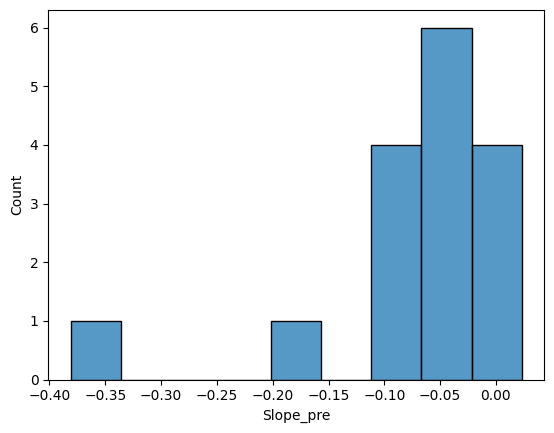

In [17]:
sns.histplot(scz_sigmoid["Slope_pre"])

<Axes: xlabel='Slope_post', ylabel='Count'>

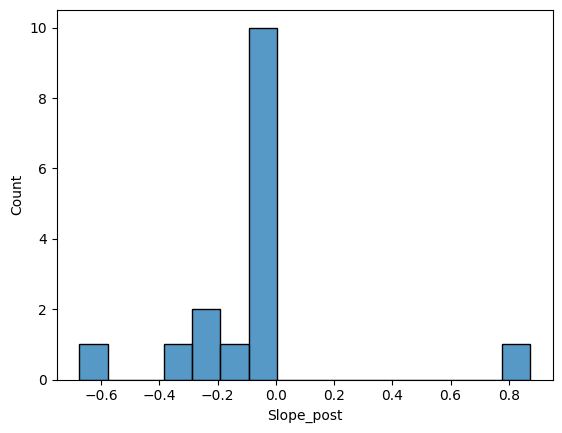

In [18]:
sns.histplot(scz_sigmoid["Slope_post"])

In [19]:
scipy.stats.wilcoxon(scz_sigmoid["CP_pre"], scz_sigmoid["CP_post"])

WilcoxonResult(statistic=np.float64(36.0), pvalue=np.float64(0.104583740234375))

In [20]:
scipy.stats.wilcoxon(scz_sigmoid["Slope_pre"], scz_sigmoid["Slope_post"])

WilcoxonResult(statistic=np.float64(49.0), pvalue=np.float64(0.348388671875))

## Group Comparison

MannwhitneyuResult(statistic=np.float64(158.0), pvalue=np.float64(0.19979656727781758))

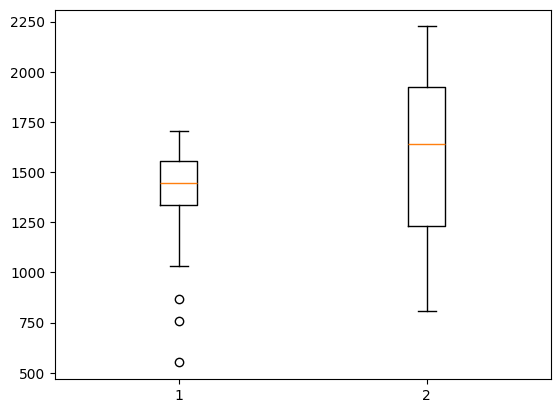

In [21]:
import matplotlib.pyplot as plt

plt.boxplot([hc_sigmoid["CP_pre"], scz_sigmoid["CP_pre"]])
scipy.stats.mannwhitneyu(hc_sigmoid["CP_pre"], scz_sigmoid["CP_pre"])

In [29]:
scipy.stats.ttest_ind(hc_sigmoid["CP_pre"], scz_sigmoid["CP_pre"], equal_var=False)

TtestResult(statistic=np.float64(-1.547787808765519), pvalue=np.float64(0.13557023157548637), df=np.float64(22.58935075882944))

MannwhitneyuResult(statistic=np.float64(171.5), pvalue=np.float64(0.3509626127410248))

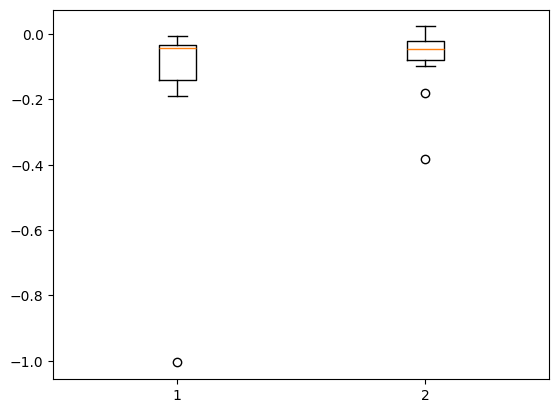

In [22]:
plt.boxplot([hc_sigmoid["Slope_pre"], scz_sigmoid["Slope_pre"]])
scipy.stats.mannwhitneyu(hc_sigmoid["Slope_pre"], scz_sigmoid["Slope_pre"])

MannwhitneyuResult(statistic=np.float64(125.0), pvalue=np.float64(0.03261434083218687))

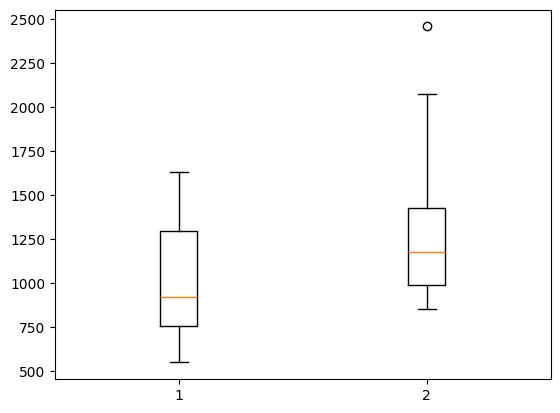

In [23]:
plt.boxplot([hc_sigmoid["CP_post"], scz_sigmoid["CP_post"]])
scipy.stats.mannwhitneyu(hc_sigmoid["CP_post"], scz_sigmoid["CP_post"])

MannwhitneyuResult(statistic=np.float64(184.5), pvalue=np.float64(0.5513020051759433))

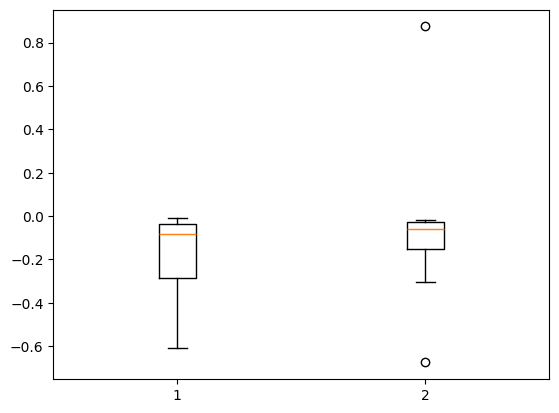

In [24]:
plt.boxplot([hc_sigmoid["Slope_post"], scz_sigmoid["Slope_post"]])
scipy.stats.mannwhitneyu(hc_sigmoid["Slope_post"], scz_sigmoid["Slope_post"])

### Deltas

MannwhitneyuResult(statistic=np.float64(211.5), pvalue=np.float64(0.9380627713404049))

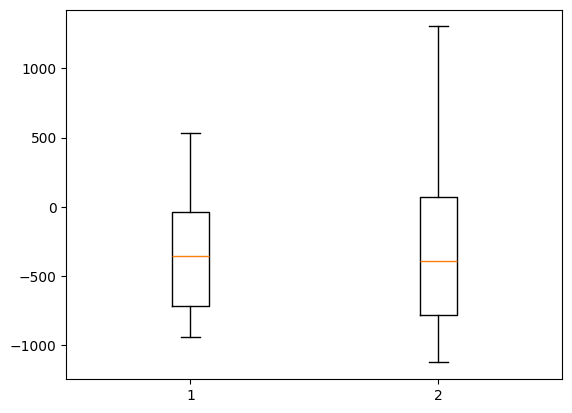

In [25]:
plt.boxplot(
    [
        hc_sigmoid["CP_post"] - hc_sigmoid["CP_pre"],
        scz_sigmoid["CP_post"] - scz_sigmoid["CP_pre"],
    ]
)
scipy.stats.mannwhitneyu(
    hc_sigmoid["CP_post"] - hc_sigmoid["CP_pre"],
    scz_sigmoid["CP_post"] - scz_sigmoid["CP_pre"],
)

MannwhitneyuResult(statistic=np.float64(205.0), pvalue=np.float64(0.9483697800841954))

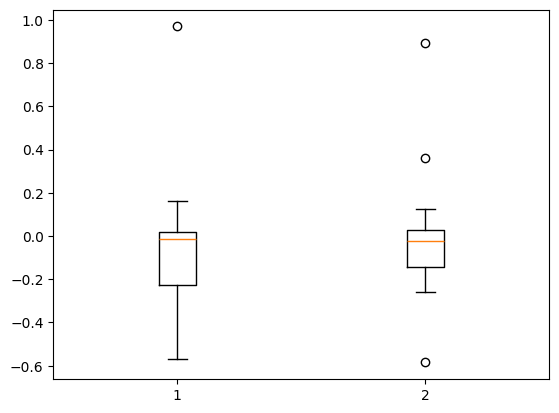

In [26]:
plt.boxplot(
    [
        hc_sigmoid["Slope_post"] - hc_sigmoid["Slope_pre"],
        scz_sigmoid["Slope_post"] - scz_sigmoid["Slope_pre"],
    ]
)
scipy.stats.mannwhitneyu(
    hc_sigmoid["Slope_post"] - hc_sigmoid["Slope_pre"],
    scz_sigmoid["Slope_post"] - scz_sigmoid["Slope_pre"],
)